In this notebook, I will compare the performance of loading numpy files vs loading h5 files and converting them to numpy.
If working with numpy files is much faster, then the h5 files should be preprocessed into numpy files

In [3]:
import h5py
import numpy as np
from datetime import datetime, timedelta
import netCDF4
import matplotlib.pyplot as plt

In [16]:
path = '/nobackup/users/schreurs/project_GAN/dataset_radar'
path_np =  '/nobackup/users/schreurs/project_GAN/dataset_radar_np'
path_aart = '/nobackup/users/schreurs/project_GAN/dataset_aart/'
path_aart_np = '/nobackup/users/schreurs/project_GAN/dataset_aart_np'

In [5]:
def load_h5(timestamp):
    path_f = path + '/RAD_NL25_RAC_RT_{}.h5'.format(timestamp)
    try:
        with h5py.File(path_f, 'r') as f:
            rain = f['image1']['image_data'][:]
            # set masked values to 0
            rain[rain == 65535] = 0
            # Expand dimensions from (w,h) to (w,h,c=1)
            rain = np.expand_dims(rain, axis=-1)
    except:
        rain = np.zeros((765,700,1))
    return rain

In [6]:
def load_np(timestamp):
    path_f = path_np + '/{}.npy'.format(timestamp)
    try:
        rain = np.load(path_f)
        # set masked values to 0
        rain[rain == 65535] = 0
        # Expand dimensions from (w,h) to (w,h,c=1)
        rain = np.expand_dims(rain, axis=-1)
    except:
        rain = np.zeros((765,700,1))
    return rain

In [7]:
def load_nc(timestamp):
    path_f = path_aart + '/RAD_NL25_RAC_MFBS_EM_5min_{}.nc'.format(timestamp)
    try:
        with netCDF4.Dataset(path_f, 'r') as f:
            # set masked values to 0
            rain = f['image1_image_data'][:][0]
            rain[rain == 65535] = 0
            # Expand dimensions from (w,h) to (w,h,c)
            rain = np.expand_dims(rain, axis=-1)
    except:
        print('Er')
        rain = np.zeros((765,700,1))
    return rain

In [31]:
def load_np_aart(timestamp):
    path_f = path_aart_np + '/{}.npy'.format(timestamp)
    try:
        rain = np.load(path_f)
        # set masked values to 0
        rain[rain == 6553500] = 0
        # Expand dimensions from (w,h) to (w,h,c=1)
        rain = np.expand_dims(rain, axis=-1)
    except:
        rain = np.zeros((765,700,1))
    return rain

(765, 700, 1)
60
(765, 700, 1)
(765, 700, 1)
74
(765, 700, 1)
59


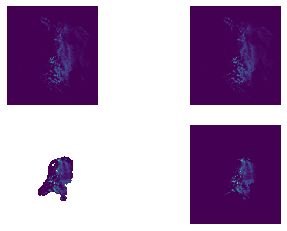

In [42]:
ts = '201903090000'

plt.figure()
# h5
rdr = load_h5(ts)
print(rdr.shape)
plt.subplot(2,2,1)
plt.imshow(np.squeeze(rdr))
print(len(np.unique(rdr)))
plt.axis('off')
# npy
rdr = load_np(ts)
print(rdr.shape)
plt.subplot(2,2,2)
plt.imshow(np.squeeze(rdr))
plt.axis('off')
# nc
rdr = load_nc(ts)
print(rdr.shape)
print(len(np.unique(rdr)))
plt.subplot(2,2,3)
plt.imshow(np.squeeze(rdr))
plt.axis('off')
# aart npy
rdr = load_np_aart(ts)
print(rdr.shape)
print(len(np.unique(rdr)))
plt.subplot(2,2,4)
plt.imshow(np.squeeze(rdr))
plt.axis('off')
plt.show()

(765, 700, 1)


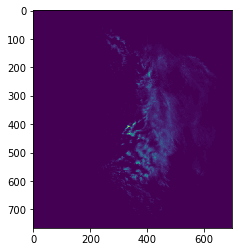

In [67]:
ts = '201903090000'
rdr = load_h5(ts)
print(rdr.shape)
plt.imshow(np.squeeze(rdr))

## Test on loading one year of data

In [67]:
start_dt = datetime(2019,1,1,0,0)
end_dt =  datetime(2019,12,31,23,55)
dts = np.arange( start_dt,
                end_dt, 
                timedelta(minutes=5)).astype(datetime)
timestamps = ['{:%Y%m%d%H%M}'.format(dt) for dt in dts]
print('Example timestamp: ', timestamps[0], ' Number of timestamps: ', len(timestamps))

Example timestamp:  201901010000  Number of timestamps:  105119


In [48]:
%%timeit
for ts in timestamps:
    load_h5(ts) 

3min 16s ± 182 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [69]:
%%timeit
for ts in timestamps:
    load_h5(ts) 

5min 24s ± 56 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [49]:
%%timeit
for ts in timestamps:
    load_np(ts) 

21min 9s ± 19.6 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [68]:
%%timeit
for ts in timestamps:
    load_np_close(ts) 

20min 57s ± 922 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Test loading batchsize of images

The algorithm will be trained on sequence batches. Assume sequence length input is 6 images and output size is also 6. Using a batchsize of 64 would load 6*64=384 images

In [43]:
start_dt = datetime(2019,1,1,0,0)
end_dt =  datetime(2019,1,2,8,0)
dts = np.arange( start_dt,
                end_dt, 
                timedelta(minutes=5)).astype(datetime)
timestamps = ['{:%Y%m%d%H%M}'.format(dt) for dt in dts]
print('Example timestamp: ', timestamps[0], ' Number of timestamps: ', len(timestamps))

Example timestamp:  201901010000  Number of timestamps:  384


In [70]:
%%timeit
for ts in timestamps:
    load_h5(ts) 

32 s ± 45.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [68]:
%%timeit
for ts in timestamps:
    load_np(ts) 

8.36 s ± 147 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [69]:
%%timeit
for ts in timestamps:
    load_nc(ts) 

2min 11s ± 576 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [71]:
%%timeit
for ts in timestamps:
    load_h5(ts) 

32 s ± 33.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [73]:
%%timeit
for ts in timestamps:
    load_np(ts) 

8.27 s ± 8.89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [72]:
%%timeit
for ts in timestamps:
    load_nc(ts) 

2min 13s ± 694 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [44]:
%%timeit
for ts in timestamps:
    load_np_aart(ts) 

487 ms ± 18.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
